In [ ]:
!pip install --upgrade gensim
!pip install --upgrade pyLDAvis
!pip install --upgrade pandas

In [ ]:
!pip install --upgrade pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

In [ ]:
import pandas as pd
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

In [ ]:
# load data bencana_cleanss
data = pd.read_csv("bencana_cleanss.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# membuat list dari data yang sudah melalui preprocessing
documents = [text.split() for text in data['text']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# membuat dictionary dan document-term matrix (DTM)
dictionary = corpora.Dictionary(documents)
dtm = [dictionary.doc2bow(doc) for doc in documents]
dtm_df = pd.DataFrame([(dictionary[id], freq) for doc in dtm for id, freq in doc], columns=['Term', 'Frequency'])
print(dtm_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


               Term  Frequency
0           ability          1
1         afterlife          1
2              anis          2
3               bro          2
4               can          1
...             ...        ...
1974829  management          1
1974830        come          1
1974831      donate          1
1974832      sister          1
1974833        jeci          1

[1974834 rows x 2 columns]


In [ ]:
# mendefinisikan range dari kandidat jumlah topik
num_topics_range = range(1, 11)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# inisialisasi list untuk menyimpan perplexity dan coherence scores
perplexity_scores = []
coherence_scores = []

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# iterasi jumlah topik yang berbeda-beda
for num_topics in num_topics_range:
    # penerapan model LDA
    lda_model = gensim.models.LdaModel(dtm, num_topics=num_topics, id2word=dictionary)

    # perhitungan perplexity
    perplexity_score = lda_model.log_perplexity(dtm)
    perplexity_scores.append(perplexity_score)

    # perhitungan coherence score
    coherence_model_lda = gensim.models.CoherenceModel(
        model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_score)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# membuat DataFrame untuk menyimpan hasilnya
results_df = pd.DataFrame({'NumTopics': num_topics_range, 'Perplexity': perplexity_scores, 'Coherence': coherence_scores})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# menentukan jumlah topik optimal berdasarkan hasil
optimal_num_topics = results_df.loc[results_df['Perplexity'].idxmin()]['NumTopics']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# penerapan model LDA akhir dengan jumlah topik optimal
final_lda_model = gensim.models.LdaModel(dtm, num_topics=optimal_num_topics, id2word=dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


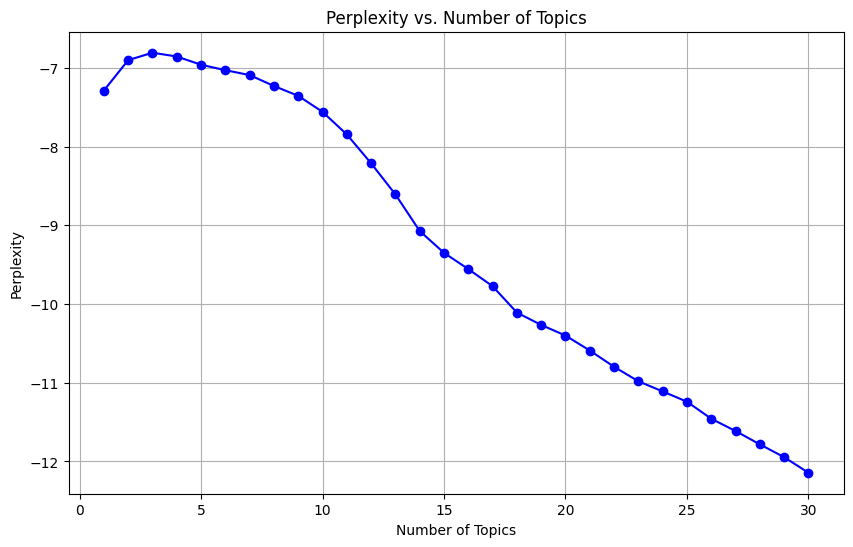

In [ ]:
# menampilkan perplexity scores
plt.figure(figsize=(10, 6))
plt.plot(results_df['NumTopics'], results_df['Perplexity'], marker='o', linestyle='-', color='b')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.title('Perplexity vs. Number of Topics')
plt.grid(True)
plt.show()

In [ ]:
# display perplexity scores dalam tabel
perplexity_table = results_df[['NumTopics', 'Perplexity']]
print(perplexity_table)

    NumTopics  Perplexity
0           1   -7.286520
1           2   -6.900082
2           3   -6.805747
3           4   -6.853932
4           5   -6.958554
5           6   -7.027625
6           7   -7.089935
7           8   -7.228502
8           9   -7.353920
9          10   -7.557250
10         11   -7.844526
11         12   -8.211581
12         13   -8.606466
13         14   -9.071840
14         15   -9.349512
15         16   -9.555627
16         17   -9.773460
17         18  -10.108491
18         19  -10.265649
19         20  -10.400475
20         21  -10.590831
21         22  -10.797494
22         23  -10.981849
23         24  -11.110527
24         25  -11.241319
25         26  -11.458077
26         27  -11.613881
27         28  -11.783254
28         29  -11.946437
29         30  -12.144048


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


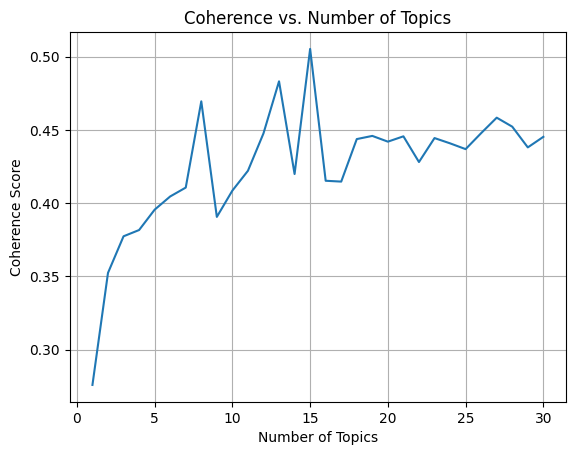

In [ ]:
# plot coherence scores
plt.plot(results_df['NumTopics'], results_df['Coherence'])
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence vs. Number of Topics')
plt.grid(True)
plt.show()

In [ ]:
# display coherence scores dalam tabel
coherence_table = results_df[['NumTopics', 'Coherence']]
print(coherence_table)

    NumTopics  Coherence
0           1   0.275969
1           2   0.352440
2           3   0.377424
3           4   0.381694
4           5   0.395587
5           6   0.404615
6           7   0.410665
7           8   0.469534
8           9   0.390660
9          10   0.408613
10         11   0.422140
11         12   0.447674
12         13   0.483204
13         14   0.419938
14         15   0.505317
15         16   0.415322
16         17   0.414754
17         18   0.443777
18         19   0.445942
19         20   0.442023
20         21   0.445652
21         22   0.428114
22         23   0.444469
23         24   0.440867
24         25   0.436920
25         26   0.447843
26         27   0.458390
27         28   0.452241
28         29   0.438104
29         30   0.445311


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# print topik-topik dan kata-kata terkait
for topic in final_lda_model.print_topics():
    print(topic)

(3, '0.564*"link" + 0.035*"anies" + 0.035*"instead" + 0.028*"million" + 0.027*"provides" + 0.027*"islam" + 0.019*"humanity" + 0.019*"almost" + 0.012*"disaster" + 0.012*"improving"')
(8, '0.100*"amp" + 0.046*"disaster" + 0.046*"rain" + 0.044*"already" + 0.036*"water" + 0.031*"facing" + 0.031*"safety" + 0.029*"heavy" + 0.024*"check" + 0.023*"economic"')
(12, '0.124*"area" + 0.110*"alert" + 0.074*"disaster" + 0.037*"police" + 0.035*"preparedness" + 0.033*"call" + 0.031*"trauma" + 0.023*"team" + 0.021*"holds" + 0.019*"natural"')
(17, '0.073*"disaster" + 0.058*"land" + 0.052*"right" + 0.044*"forest" + 0.044*"family" + 0.043*"thats" + 0.031*"fires" + 0.027*"problem" + 0.026*"new" + 0.020*"victim"')
(28, '0.196*"report" + 0.174*"disaster" + 0.154*"thank" + 0.133*"hi" + 0.071*"near" + 0.015*"main" + 0.013*"workshop" + 0.013*"prophet" + 0.009*"assessment" + 0.009*"conflict"')
(1, '0.109*"message" + 0.047*"disaster" + 0.045*"always" + 0.035*"may" + 0.031*"disasters" + 0.028*"people" + 0.026*"hel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print all the topics
for topic_id in range(final_lda_model.num_topics):
    topic = final_lda_model.show_topic(topic_id)
    print(f"Topic {topic_id + 1}: {topic}")

Topic 1: [('need', 0.064948834), ('cause', 0.040029842), ('disasters', 0.034661323), ('can', 0.03397544), ('countries', 0.032275993), ('one', 0.032178722), ('two', 0.026245631), ('see', 0.025822435), ('disaster', 0.023922274), ('thing', 0.023718007)]
Topic 2: [('message', 0.109444216), ('disaster', 0.046569012), ('always', 0.045179136), ('may', 0.034809925), ('disasters', 0.030729812), ('people', 0.02770839), ('help', 0.025559403), ('years', 0.017837072), ('can', 0.016552629), ('allah', 0.015578675)]
Topic 3: [('disaster', 0.09296955), ('brings', 0.041639164), ('today', 0.039658464), ('time', 0.036606867), ('increase', 0.029975194), ('destroyed', 0.02763325), ('according', 0.027146831), ('sis', 0.025941951), ('survive', 0.02544001), ('parties', 0.025017016)]
Topic 4: [('link', 0.56441665), ('anies', 0.035345737), ('instead', 0.035200346), ('million', 0.027816659), ('provides', 0.02683169), ('islam', 0.026566753), ('humanity', 0.01947388), ('almost', 0.019206585), ('disaster', 0.0121572

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# visualisasi topik menggunakan pyLDAvis
vis_data = gensimvis.prepare(final_lda_model, dtm, dictionary, sort_topics=False)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
